Scraping Topic Wise Video Details on [YouTube](https://www.youtube.com/) using Selenium

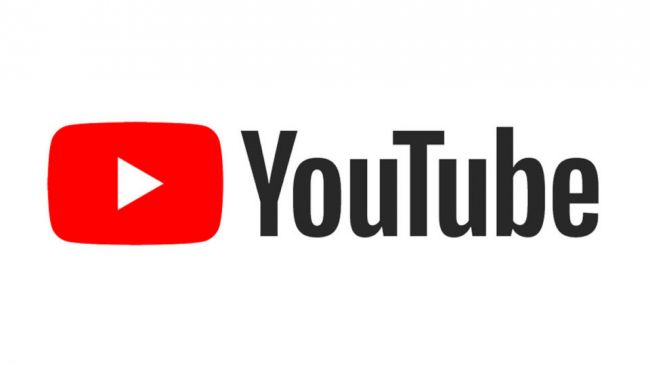

## Introduction

### What is Web-Scraping
Web scraping is the process of extracting and parsing data from websites in an automated fashion using a computer program. It's a useful technique for creating datasets for research and learning.

### Little About YouTube.

YouTube is a free video-sharing website that makes it easy to watch online videos. visitors watching around 6 billion hours of video every month. One reason YouTube is so popular is the sheer number of videos you can find. On average, 100 hours of video are uploaded to YouTube every minute, so there's always something new to watch!

### Project Do Following:
1.   Scraping [YouTube](https://www.youtube.com/) videos on Python Language using Requests, Pandas, Selenium based on word(s) provided by user.

2.   Scraping Video Informations like Title, Channel Name, video Link etc.

1.   Get result for number of videos.
2.   Store Data in .CSV file.

### Objective
To create helping function to built dataset of video informations on perticular topic.

### Outline:
1. Understanding the structure of the YouTube Website. 
2. Installing and Importing required libraries. 
3. Getting the keyword(s) from user. 
4. Using we search videos for the Keyword.
5. Download the webpage URL using selenium Web-driver
5. Parsing the Top Videos get the below attributes using functions.
 
  A. Video Title  
  B. Name of the Channel 	
  C. No.  Of views  
  D. Video Length	
  E. Thumbnail image  
  F. Video Link 
6. Create helper functions to get combined lists
7. Storing the extracted data into a dictionary.
8. Compiling all the data into a DataFrame using Pandas and saving the data into .CSV file. 


CSV file will look something like this!
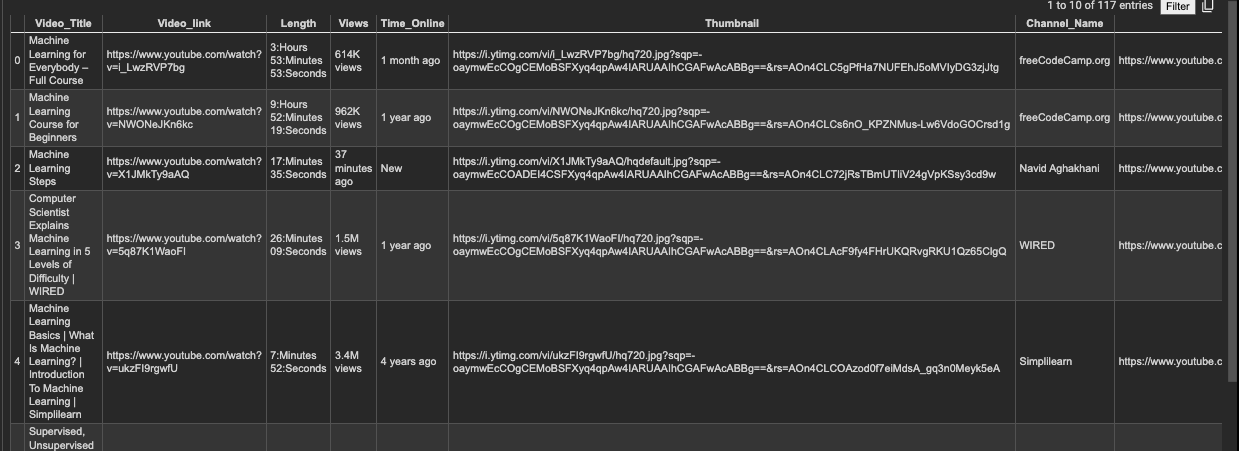

## YouTube Scraping

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('shashwat-webscraping-project')
jovian.set_colab_id('1cQhcT7f4d3pRv9h5g7uq_g9oh2pbf0zW')

     |████████████████████████████████| 68 kB 4.6 MB/s 


In [ ]:
project_name = "shashwat-webscraping-project"
jovian.commit(project = project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shashwatpatel/shashwat-webscraping-project


'https://jovian.ai/shashwatpatel/shashwat-webscraping-project'

What is Colab?
Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
Zero configuration required,
Access to GPUs free of charge,
Easy sharing.

What is Kora?
Kora is a collection of tools to make programming on Google Colab easier.

In [ ]:
!pip install kora -q

     |████████████████████████████████| 57 kB 5.3 MB/s 
     |████████████████████████████████| 1.6 MB 62.0 MB/s 


### Setting Up Environment

#### importing necessary libraries

In [ ]:
from kora.selenium import wd
import requests

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [ ]:
from selenium.webdriver.common.keys import Keys


In [ ]:
import pandas as pd
import time

#### Taking Topic from User
The get_keyword( ) takes user input and returns link managable string. 

In [ ]:
# Take Keyword from User
def get_keyword():
  """
  Gets kaywords from user
  """
  print("Welcome to Youtube Web Scraping:")
  keyword = input("Please Enter the topic that you want videos on.")
  keyword = "".join(keyword.split()) # Removes spaces from string
  return keyword

#### Setting up url
The setup_driver() takes keyword which returns by get_keyword()
and using requests modules returns web object containing the data present in that web page.

In [ ]:
# Create url and setup webdriver
def setup_driver(keyword):  
    """
    Takes topic and return complete url
    """
    print("Creating URL...")
    base_url = "https://www.youtube.com/results?search_query="
    topic_url = base_url + keyword
    print("URL :",   topic_url)

    #  Checking if the webpage allows Scraping
    response = requests.get(topic_url)
    if 200 > response.status_code < 299:
        raise Exception(f"Something Went Wrong: {response.status_code}")
    
    print("Setting Up URL...")
    YouTube_url = wd.get(topic_url)
    
    print("Setup Complete...")


### Scraping Video informations

#### Getting Videos

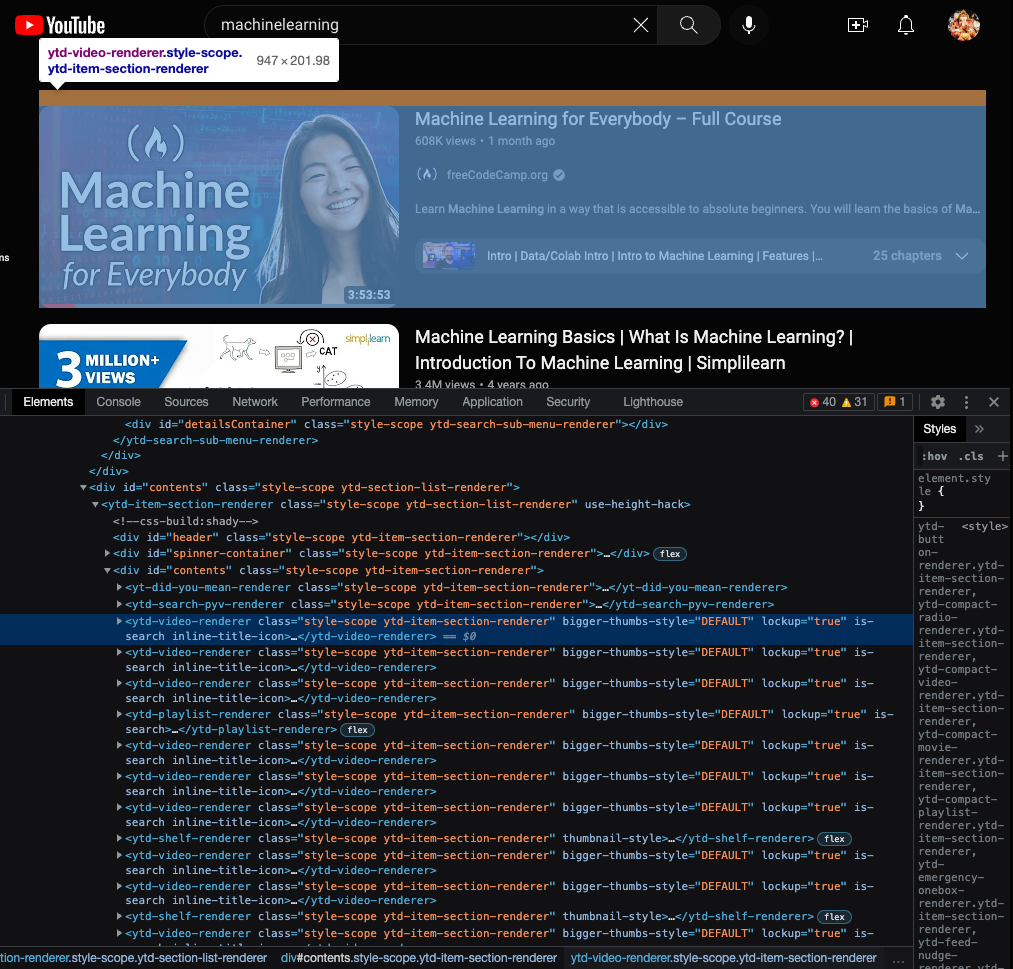

In [ ]:
# Creates a list of Videos
def fetch_videos():

  print("Getting Videos...") 
  print("Please wait... Might Take Couple of Minutes")

  # Scrolling Infinite to Get More Videos
  scroll = wd.find_element(By.TAG_NAME, 'body')
  scroll_times = 0
  while scroll_times <50: # 50 because it gives around 100 videos to meet requirement
  #while True:# For more results Take significanly amount of time.
      scroll.send_keys(Keys.PAGE_DOWN)
      time.sleep(1)
      scroll_times += 1


  video_tag_name = "ytd-video-renderer"
  main_vaideos = wd.find_elements(By.TAG_NAME, video_tag_name)

  print(f" {len(main_vaideos)} Videos Found...")
  
  return main_vaideos


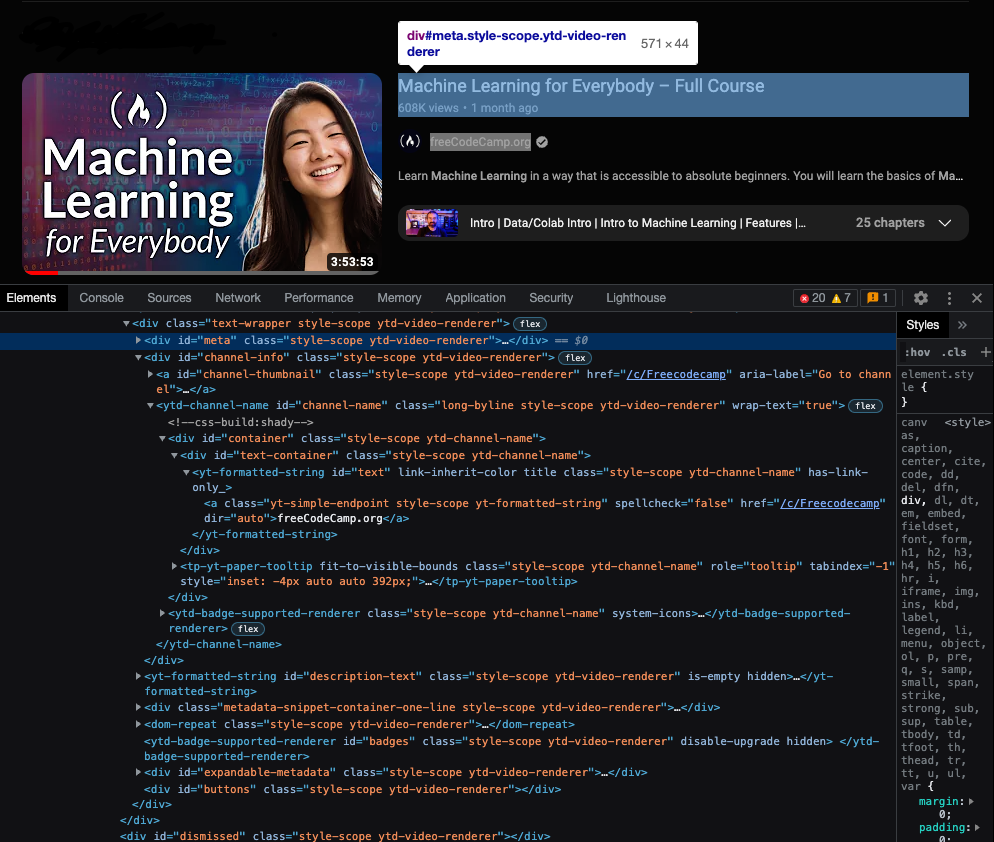

#### Parsing VideoInformation
parsing_video() Takes a single video tag parse the needed informations structure them in managable dictionary formet,
and return dictionary

In [ ]:
# parse information from video

def video_title(video):
    
    # Title
    title_tag = video.find_element(By.ID, 'video-title')
    title = title_tag.get_attribute("title")
    
    # Video URL
    video_link = title_tag.get_attribute("href")
    
    # Total Length
    length_tag = video.find_element(By.CLASS_NAME, 'style-scope ytd-thumbnail-overlay-time-status-renderer').text  
    l=  length_tag.split(":")
    if len(l) == 3:
      length= (f"{l[-3]}:Hours {l[-2]}:Minutes {l[-1]}:Seconds")
    elif len(l) == 2:
      length= (f"{l[-2]}:Minutes {l[-1]}:Seconds")
    else:
      length = length_tag

    return {"Video_Title": title,
            "Video_link": video_link,
            "Length": length
            }


def video_data(video):
   
    # Views
    view_tag = video.find_elements(By.TAG_NAME, "span")
    views = view_tag[3].text
    
    # When Uploaded
    when_upload = view_tag[4].text
    
    # Thumbnail Image
    tn_tag = video.find_element(By.TAG_NAME, "img")
    thumbnail_link = (tn_tag.get_attribute("src"))

    return {"Views": views,
            "Time_Online": when_upload,
            "Thumbnail": thumbnail_link
          }


def channel_info(video):
  
  # Channel Name
  channel_tag = video.find_element(By.CLASS_NAME, 'yt-formatted-string')
  channel_name = (channel_tag.get_attribute("text"))
  
  # Channel Link
  channel_link = (channel_tag.get_attribute("href"))

  return {"Channel_Name": channel_name,
          "Channel_Link":channel_link
          }

In [ ]:
def parsing_video(video):

  vt = video_title(video)
  vd = video_data(video)
  ci = channel_info(video)

  video_info = vt.copy()
  for keys, values in vd.items():
    video_info[keys] = values
  for keys,values in ci.items():
        video_info[keys] = values

  return video_info

#### Document it... What we got

write_CSV() takes video_info (a list of dictionary) returned by parse_video() and keyword to create path for .CSV file.


In [ ]:
def write_CSV(video_info, keyword):
    print("Creating the CSV...")

    video_df = pd.DataFrame(video_info, index=None)

    print("Saving to CSV...")
    # print(video_df)
    filename = (f"{keyword}_YouTube_WS_Shashwat.csv")
    
    video_df.to_csv(filename)
    print(filename, "File Created...")

    return

Pandas DataFrame() is used to write to CSV file. Final DataFrame Look Something Like this

#### Make it exclusive

Program will execute only if run as script from commandline. 

If code imported from another file, execution won't happen.

#### Wrap everything in single function

 scrape_youtube() rhythmicly calls all other functions for harmony.

In [ ]:
if __name__ == "__main__":

  # calls all other functions
  def scrape_youtube():
      """
      All other functions call by this functions,
      So By calling Single function at last get whole project.
      """
      keyword = get_keyword()
      setup_driver(keyword)
      videos = fetch_videos()

      print("Parsing the Video Informations...")
      video_info =[]
      for video in videos:
        video_dict = (parsing_video(video))
        video_info.append(video_dict)
        print(video_info)

      write_CSV(video_info,keyword)

      print("Done...")

### Execution of Code
Scrape YouTube Now...

In [ ]:
scrape_youtube()

Should be getting .CSV similar to this.

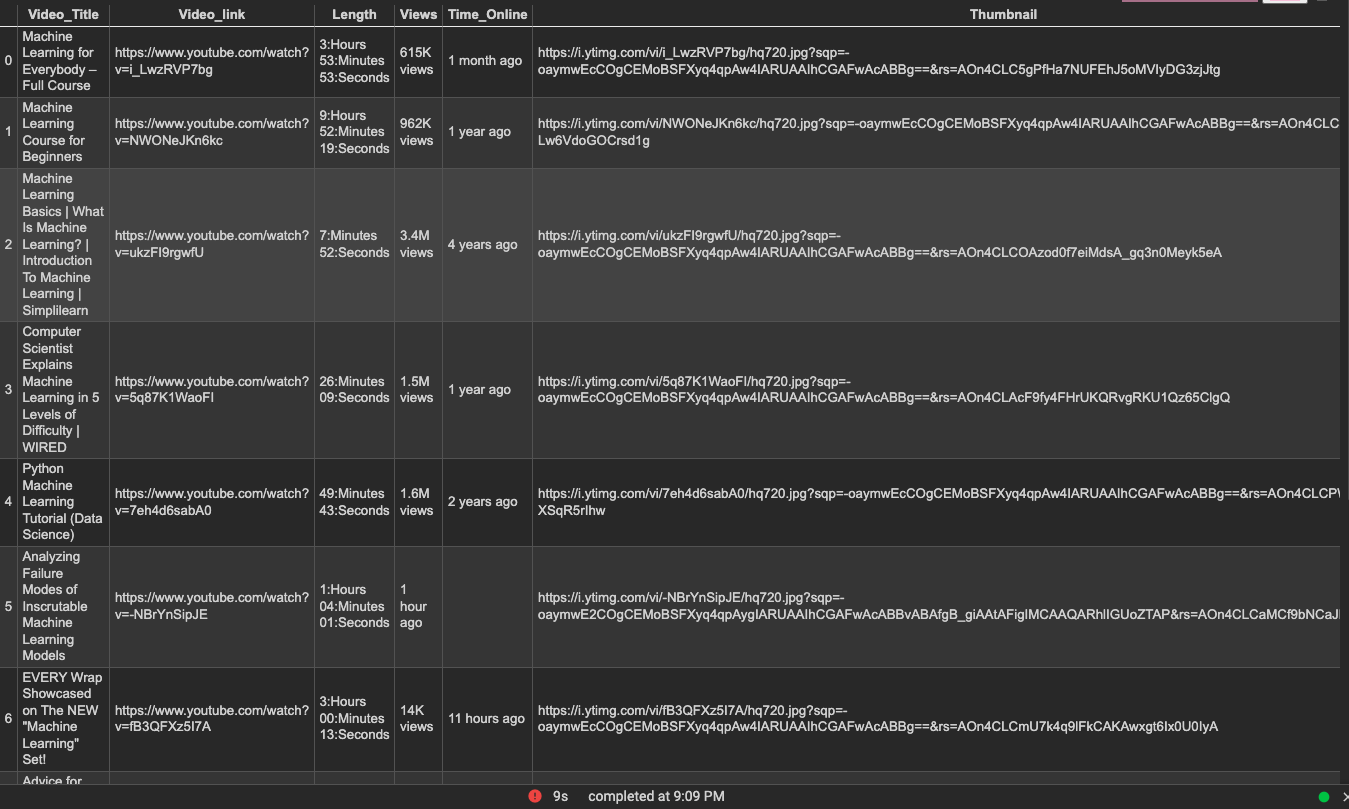

## Conclusion

### Summary

*   Program successfully created using Python Web-Scraping
*   Scraping was done using Selenium and requests.
*   Users can type any topic that they want.
*   Automatically CSV has been generated using user given keyword.

### Future Work:



*   Send Email:

>>Send results over email using SMTP

*   Recurring job:  Set up a recurring job on AWS Lambda
     

>> Script will Execute at a given time to create comprehensive datasets


### Resources


*   [Jovian: Zero To Data Analyst Bootcamp](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/web-scraping-with-selenium-aws)

*   [w3schools](https://www.w3schools.com/)


*   [Just GOOGLE it!](https://www.google.com/)

*   [YouTube](https://youtube.com)




*   [Stackoverflow](https://stackoverflow.com/)

*   [Project blog: By Vinod Dhole](https://jovian.ai/outlink?url=https%3A%2F%2Fmedium.com%2F%40vinodvidhole%2Fautomate-web-scraping-using-python-aws-lambda-amazon-s3-amazon-eventbridge-cloudwatch-c4c982c35fa7)

In [ ]:
jovian.commit()

NameError: ignored